In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
d1 = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])


clusterCentroid = [d1[1],d1[2],d1[7]]
print(clusterCentroid)

cluster =[0]*len(d1)
print(cluster)

dataset_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df= pd.read_csv(dataset_url)
df2=df
df2['sbp'] = (df['sbp'] - df['sbp'].mean())/df['sbp'].std()
df2['tobacco'] = (df['tobacco'] - df['tobacco'].mean())/df['tobacco'].std()
df2_train = df2[0:300]
df2_test = df2[300:]
print(df2_train)
print(df2_test)


[array([2, 5]), array([8, 4]), array([4, 9])]
[0, 0, 0, 0, 0, 0, 0, 0]
     row.names       sbp   tobacco   ldl  adiposity  famhist  typea  obesity  \
0            1  1.057417  1.821099  5.73      23.11  Present     49    25.30   
1            2  0.276789 -0.789382  4.41      28.61   Absent     55    28.87   
2            3 -0.991731 -0.774141  3.48      32.28  Present     52    29.14   
3            4  1.545310  0.841352  6.41      38.03  Present     51    31.99   
4            5 -0.211103  2.169453  3.50      27.78  Present     60    25.99   
..         ...       ...       ...   ...        ...      ...    ...      ...   
295        297  0.179211 -0.791559  4.19      18.04   Absent     56    23.65   
296        298 -0.308682 -0.769787  3.28      10.73   Absent     73    20.42   
297        299 -0.113525 -0.791559  2.28      18.14   Absent     55    22.59   
298        300 -0.308682  1.821099  4.51      21.93   Absent     61    26.07   
299        301  1.350153  0.101099  4.00      34.

In [3]:
#KMeans algorithm for dataset 1
def kMeans(d1,Kcluster,Centroid):
  count = 0
  newCluster = Kcluster
  oldCluster = Kcluster
  while True:
    newCluster = kMeansCalc(d1,newCluster,Centroid)
    Centroid = updateCentroids(d1,newCluster,Centroid)
    plotCluster(d1,newCluster,Centroid)
    print(Centroid)
    count +=1
    if(oldCluster==newCluster):
      count -=1
      print(f'{count} iterations were needed to converge')
      break
    oldCluster = newCluster


  return cluster,Centroid

def kMeansCalc(d1,cluster,Centroid):
  label = []

  for point in d1:
    min_dist = float('inf')
    clus=-1
    for i,centroid in enumerate(Centroid):
      dist = ((point[0]-centroid[0])**2 + (point[1]-centroid[1])**2)**0.5
      if dist <min_dist:
        min_dist=dist
        clus = i
    label.append(clus)
  return label

def updateCentroids(d1,cluster,Centroid):
  new_Centroid= [[0,0]for i in range(len(Centroid))]
  counts = [0]*len(Centroid)

  for point,label in zip(d1,cluster):
    new_Centroid[label][0]+=point[0]
    new_Centroid[label][1]+=point[1]
    counts[label]+=1

  for i,(x,y)in enumerate(new_Centroid):
    new_Centroid[i] = (x/counts[i],y/counts[i])
  return new_Centroid


#Cluster plotting for dataset 1
def plotCluster(d1,cluster,Centroid):
  XCluster = []
  YCluster = []

  clusNum = 0
  for j,cen in enumerate(Centroid):
    xClus = []
    yClus=[]
    for i,point in enumerate(cluster):
      if point == j:
        xClus.append(d1[i][0])
        yClus.append(d1[i][1])
    XCluster.append(xClus)
    YCluster.append(yClus)


  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  for i in range(len(Centroid)):
    ax1.scatter(XCluster[i],YCluster[i],marker="s")
  plt.show()

#KMeans algorithm for dataset 2
def random_sample(low,high):
  return low + (high-low)*random.random()

def initializeCentroids(df,k):
  x_min = df['sbp'].min()
  x_max = df['sbp'].max()
  y_min = df['tobacco'].min()
  y_max = df['tobacco'].max()
  centroid=[]
  for i in range(k):
    centroid.append([random_sample(x_min,x_max),random_sample(y_min,y_max)])
  return centroid

def KMeans_dataset2(df, k):
  cluster =[-1]*len(df)
  centroid = initializeCentroids(df,k)
  print(centroid)

  count =0
  df2=df.values

  oldCluster = cluster
  while True:
    cluster = kMeansCalcDF2(df2,cluster,centroid)
    centroid = updateCentroidsDF2(df2,cluster,centroid)
    if(oldCluster==cluster):
      print(f'{count} iterations were needed to converge')
      plotClusterDF2(df2,cluster,centroid)
      print(centroid)
      break
    count +=1
    oldCluster = cluster

  return cluster,centroid

def kMeansCalcDF2(df,cluster,Centroid):
  label = []
  for point in df:
    min_dist = float('inf')
    clus=-1
    for i,centroid in enumerate(Centroid):
      dist = ((point[1]-centroid[0])**2 + (point[2]-centroid[1])**2)**0.5
      if dist <min_dist:
        min_dist=dist
        clus = i
    label.append(clus)
  return label

def updateCentroidsDF2(df,cluster,centroid):
  new_Centroid= [[0,0]for i in range(len(centroid))]
  counts = [0]*len(centroid)

  for point,label in zip(df,cluster):
    new_Centroid[label][0]+=point[1]
    new_Centroid[label][1]+=point[2]
    counts[label]+=1

  for i,(x,y)in enumerate(new_Centroid):
    new_Centroid[i] = (x/counts[i],y/counts[i])
  return new_Centroid

#Cluster plotting for dataset 2 using kmeans
def plotClusterDF2(d2,cluster,Centroid):
  XCluster = []
  YCluster = []

  clusNum = 0
  for j,cen in enumerate(Centroid):
    xClus = []
    yClus=[]
    for i,point in enumerate(cluster):
      if point == j:
        xClus.append(d2[i][1])
        yClus.append(d2[i][2])
    XCluster.append(xClus)
    YCluster.append(yClus)


  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  for i in range(len(Centroid)):
    ax1.scatter(XCluster[i],YCluster[i],marker="s")
  plt.show()

Part A


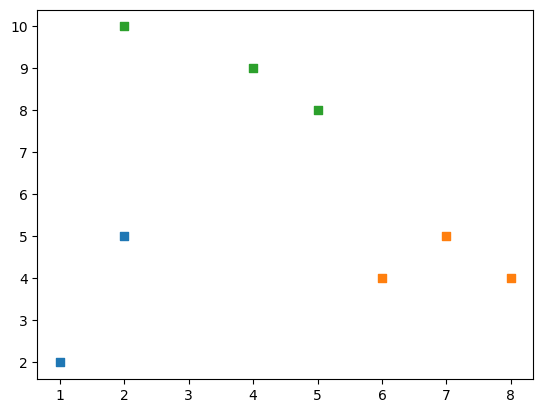

[(1.5, 3.5), (7.0, 4.333333333333333), (3.6666666666666665, 9.0)]


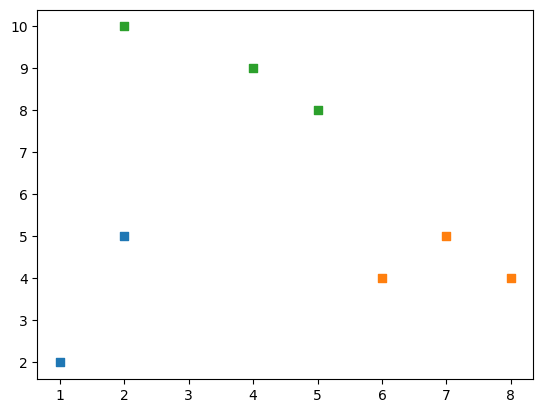

[(1.5, 3.5), (7.0, 4.333333333333333), (3.6666666666666665, 9.0)]
1 iterations were needed to converge


In [4]:
print("Part A")
#K Means Clustering Q1-5
cluster, clusterCentroid = kMeans(d1,cluster,clusterCentroid)


[[1.4731145658014428, 1.8265805608116006], [0.8068350094204386, 2.5492722437364423]]
14 iterations were needed to converge


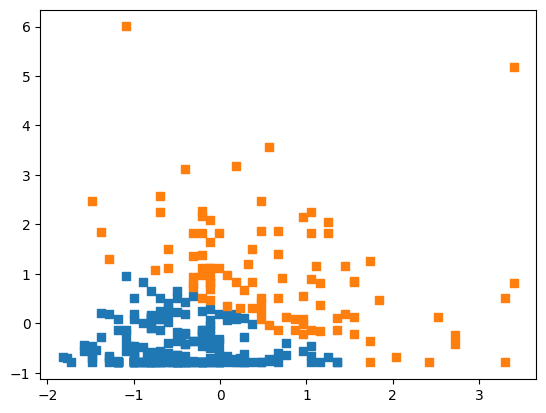

[(-0.4726612763482906, -0.46338365337242204), (0.6316668635076929, 1.0150709655787842)]
57
148
53
42
Clusters will be labeled for CHD values as the following [0, 1]


In [5]:
# K Means training for dataset 2
clusterDF2PA,centroidDF2PA = KMeans_dataset2(df2_train,2)


def label_Cluster_CHD(centroids,clusterDF2,df):
  cluster_count1 = []
  cluster_count0=[]
  for i,cen in enumerate(centroids):
    clusCnt1=0
    clusCnt0=0
    for j,point in enumerate(clusterDF2):
      if df['chd'][j] ==1 and point==i:
        clusCnt1+=1
      elif df['chd'][j]==0 and point==i:
        clusCnt0+=1

    print(clusCnt1)
    print(clusCnt0)

    cluster_count1.append(clusCnt1)
    cluster_count0.append(clusCnt0)

  cluster_label=[0]*len(centroids)
  maxCHD =0
  ind =-1
  for i in range(len(cluster_count1)):
    ratio=(cluster_count1[i]/(cluster_count0[i]+cluster_count1[i]))*100
    if (ratio>50):
      cluster_label[i]=1
  print(f"Clusters will be labeled for CHD values as the following {cluster_label}")
  return cluster_label

cluster_label = label_Cluster_CHD(centroidDF2PA,clusterDF2PA,df2_train)





In [6]:
#Q6

#Accuracy function used by kmeans and NN algorithm for dataset 2 training
def Clustering_Accuracy(cluster_label,cluster,df):
  tp=0
  tn=0
  fp=0
  fn=0

  for i,point in enumerate(df):
    if point[10]==1:
      if cluster_label[cluster[i]]==1:
        tp+=1
      else:
        fn+=1
    if point[10]==0:
      if cluster_label[cluster[i]]==0:
        tn+=1
      else:
        fp+=1

  print(f"True positives: {tp}")
  print(f"False positives: {fp}")
  print(f"True negatives: {tn}")
  print(f"False negatives: {fn}")

  Accuracy = ((tp+tn)/(tn+fp+tp+fn))*100
  print(f"Accuracy is {Accuracy}%")


print("Training dataset accuracy:")
Clustering_Accuracy(cluster_label,clusterDF2PA,df2_train.values)

Training dataset accuracy:
True positives: 53
False positives: 42
True negatives: 148
False negatives: 57
Accuracy is 67.0%


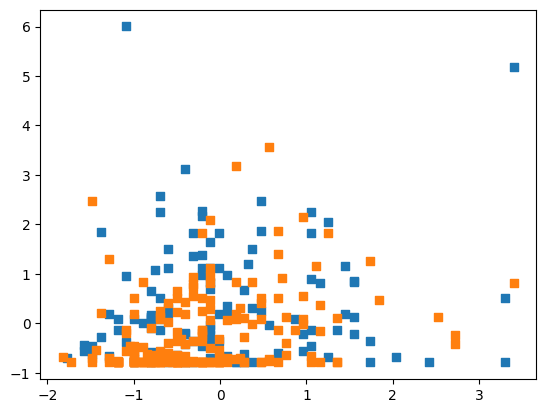

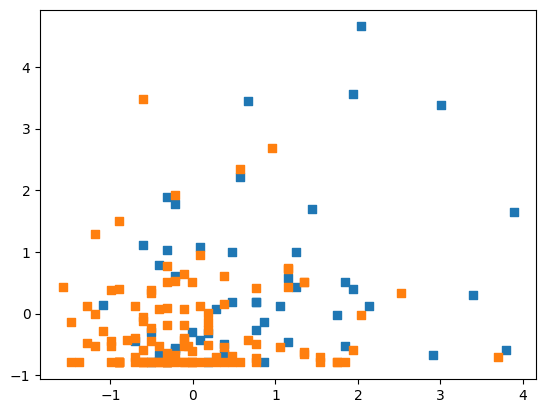

In [7]:
#Q7
def plot_SBP_Tobacco_Actual(d2):
  XCluster = []
  YCluster = []

  clusNum = 0
  xClus1 = []
  yClus1=[]
  xClus2 = []
  yClus2=[]


  for i,point in enumerate(d2):
    if d2[i][10] == 1:
      xClus1.append(d2[i][1])
      yClus1.append(d2[i][2])
    else:
      xClus2.append(d2[i][1])
      yClus2.append(d2[i][2])

  XCluster.append(xClus1)
  YCluster.append(yClus1)
  XCluster.append(xClus2)
  YCluster.append(yClus2)


  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  for i in range(len(XCluster)):
    ax1.scatter(XCluster[i],YCluster[i],marker="s")
  plt.show()

plot_SBP_Tobacco_Actual(df2_train.values)
plot_SBP_Tobacco_Actual(df2_test.values)

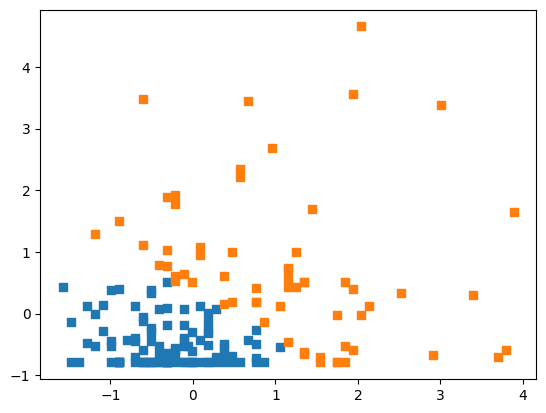

Accuracy of test dataset:
True positives: 32
False positives: 30
True negatives: 82
False negatives: 18
Accuracy is 70.37037037037037%


In [8]:
#Q8

def plot_SBP_Tobacco_Predict(d2,Centroid):
  XCluster = []
  YCluster = []

  clusNum = 0
  xClus1 = []
  yClus1=[]
  xClus2 = []
  yClus2=[]

  label=[]
  for i,point in enumerate(d2):
    min_dist = float('inf')
    clus=-1
    for j,cen in enumerate(Centroid):
      dist = ((point[1]-cen[0])**2 + (point[2]-cen[1])**2)**0.5
      if dist<min_dist:
        min_dist=dist
        clus =j
    label.append(clus)

  for j,cen in enumerate(Centroid):
    xClus = []
    yClus=[]
    for i,point in enumerate(label):
      if point == j:
        xClus.append(d2[i][1])
        yClus.append(d2[i][2])
    XCluster.append(xClus)
    YCluster.append(yClus)


  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  for i in range(len(XCluster)):
    ax1.scatter(XCluster[i],YCluster[i],marker="s")
  plt.show()
  return label


clusterTest1 = plot_SBP_Tobacco_Predict(df2_test.values,centroidDF2PA )
print("Accuracy of test dataset:")
Clustering_Accuracy(cluster_label,clusterTest1,df2_test.values)

Part B


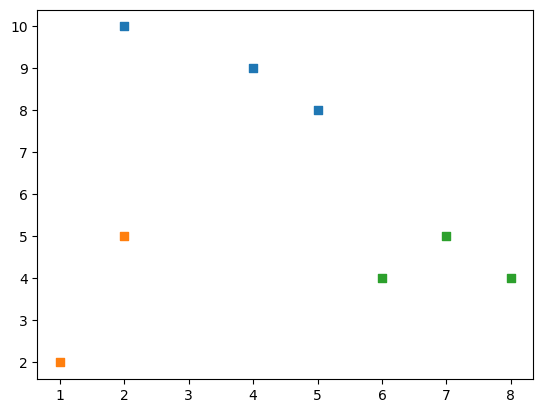

[(3.6666666666666665, 9.0), (1.5, 3.5), (7.0, 4.333333333333333)]


In [9]:
print("Part B")

#Q9: The nearest neighbour clustering has given the same result as kmeans
#Q10: Graph below
#Q11: The nearest neighbour was more time efficient since it only run the algorithm once through all the data points whereas kmeans must always run at least 2 times. Although it was more efficient for this case, it would be
# disadvantageous to use it for a larger dataset it would need to calculate the distance for every point. More points means more time calculating


def nearestNeigh(d1,t):
  countClus =-1
  cluster=[]
  for i in range(len(d1)):
    min_dist=4
    clusNum = -1
    for j in range(len(cluster)):
      if i!=j:
        dist = ((d1[i][0]-d1[j][0])**2 + (d1[i][1]-d1[j][1])**2)**0.5
        if dist<min_dist:
          min_dist= dist
          clusNum = cluster[j]
    if clusNum!=-1:
      cluster.append(clusNum)
    else:
      countClus+=1
      cluster.append(countClus)

  CentroidNum = [[0]*2]*(countClus+1)
  Centroids = updateCentroids(d1,cluster,CentroidNum)

  plotCluster(d1,cluster,Centroids)
  print(Centroids)


nearestNeigh(d1,4)


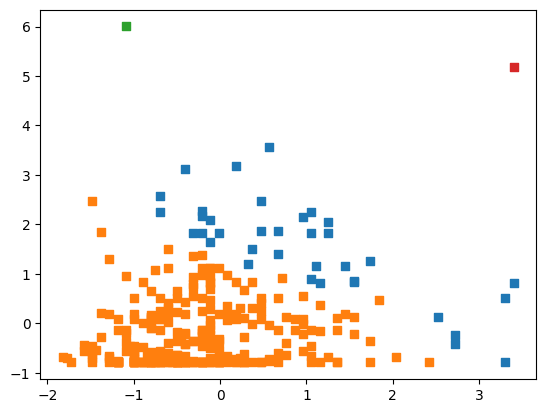

22
14
86
176
1
0
1
0
Clusters will be labeled for CHD values as the following [1, 0, 1, 1]
[(0.9408651866176689, 1.5486445616310551), (-0.2788868241549665, -0.24995600092756415), (-1.0893098323811647, 6.001351218460246), (3.3993014245775384, 5.174009594481661)]
Accuracy for training set:
True positives: 24
False positives: 14
True negatives: 176
False negatives: 86
Accuracy is 66.66666666666666%


Q12: Accuracy for test set:
True positives: 14
False positives: 8
True negatives: 104
False negatives: 36
Accuracy is 72.8395061728395%


In [10]:
#Q12

def nearestNeighDataset2(df,thresh):
  countClus =-1
  cluster=[]
  for i in range(len(df)):
    min_dist=thresh
    clusNum = -1
    for j in range(len(cluster)):
      if i!=j:
        dist = ((df[i][1]-df[j][1])**2 + (df[i][2]-df[j][2])**2)**0.5
        if dist<min_dist:
          min_dist= dist
          clusNum = cluster[j]
    if clusNum!=-1:
      cluster.append(clusNum)
    else:
      countClus+=1
      cluster.append(countClus)

  CentroidNum = [[0]*2]*(countClus+1)

  XCluster=[]
  YCluster=[]

  for j in range(len(CentroidNum)):
    xClus = []
    yClus=[]
    for i,point in enumerate(cluster):
      if point == j:
        xClus.append(df[i][1])
        yClus.append(df[i][2])
    XCluster.append(xClus)
    YCluster.append(yClus)


  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  for i in range(len(XCluster)):
    ax1.scatter(XCluster[i],YCluster[i],marker="s")
  plt.show()



  return cluster,CentroidNum

def nearestNeighDataset2_Predict(df_test,df_train,cluster):
  countClus =-1
  pred_cluster=[]

  for i,p1 in enumerate(df_test):
    min_dist = float('inf')
    clusNum=-1
    for j,p2 in enumerate(df_train):
      dist = ((p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)**0.5
      if dist<min_dist:
        min_dist=dist
        clusNum= cluster[j]
    pred_cluster.append(clusNum)

  return pred_cluster

NN_Cluster,NN_Centroid = nearestNeighDataset2(df2_train.values,2)

NN_Centroid = updateCentroidsDF2(df2_train.values,NN_Cluster,NN_Centroid)

NN_cluster_label = label_Cluster_CHD(NN_Centroid,NN_Cluster,df2_train)

NN_Cluster_Predict = nearestNeighDataset2_Predict(df2_test.values,df2_train.values,NN_Cluster)

print(NN_Centroid)
print("Accuracy for training set:")
Clustering_Accuracy(NN_cluster_label,NN_Cluster,df2_train.values)
print()
print("\nQ12: Accuracy for test set:")
Clustering_Accuracy(NN_cluster_label,NN_Cluster_Predict ,df2_test.values)

Part C
Performing DBScan with epsilon 2


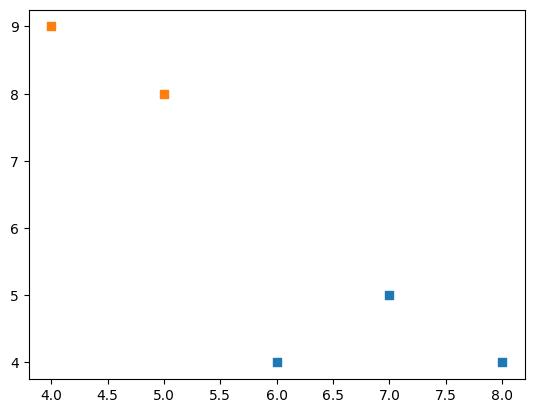

Performing DBScan with epsilon 3.1622776601683795


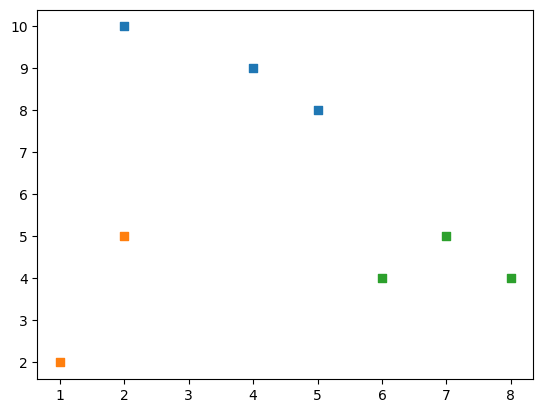

In [11]:
print("Part C")


def ClusterChain(cluster,clusNum,dbscanPoints,num,minPoint,clusVisited):

  cluster[num]=clusNum
  clusVisited[num]=1
  for pt in dbscanPoints[num]:
    cluster[pt] = clusNum
    if (len(dbscanPoints[pt])<minPoint):
      continue
    else:
      if(clusVisited[pt]==-1):
        cluster,clusVisited = ClusterChain(cluster,clusNum,dbscanPoints,pt,minPoint,clusVisited)
  return cluster,clusVisited

def DBScan(d1,eps,minPoint):

  print(f"Performing DBScan with epsilon {eps}")
  cluster = [-1]*len(d1)

  dbscanPoints = []

  for i,p1 in enumerate(d1):
    scanPts = []
    for j,p2 in enumerate(d1):
      dist = ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
      if dist<=eps:
        scanPts.append(j)
    dbscanPoints.append(scanPts)

  clusNum=0
  clusVisited =  [-1]*len(d1)

  for i in range(len(cluster)):

    if len(dbscanPoints[i])<minPoint:
      continue
    else:
      if cluster[i]==-1:
        cluster[i] = clusNum
        cluster,clusVisited = ClusterChain(cluster,clusNum,dbscanPoints,i,minPoint,clusVisited)
        clusNum+=1

  Centroids = [[0]*2]*(clusNum)
  plotCluster(d1,cluster,Centroids)

#Q13
DBScan(d1,2,2)
#Q14
DBScan(d1,10**0.5,2)

Performing DBScan with epsilon 0.2
Number of data points in each cluster:
146
26
12
12
6


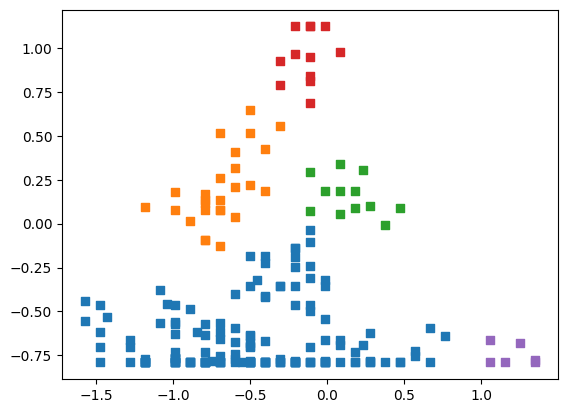

Cluster id numbers are:
[0, 1, 2, 3, 4]

Clusters will be labeled for CHD values as the following [0, 0, 0, 1, 0]

Q15:Accuracy of test set
True positives: 0
False positives: 8
True negatives: 104
False negatives: 36
Accuracy is 70.27027027027027%


In [12]:
def DBScan_Dataset2(df,eps,minPoint):

  print(f"Performing DBScan with epsilon {eps}")
  cluster = [-1]*len(df)

  dbscanPoints = []

  for i,p1 in enumerate(df):
    scanPts = []
    for j,p2 in enumerate(df):
      dist = ((p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)**0.5
      if dist<=eps:
        scanPts.append(j)
    dbscanPoints.append(scanPts)

  clusNum=0
  clusVisited = [-1]*len(df)
  for x in range(2):
    for i in range(len(cluster)):
      if len(dbscanPoints[i])>=minPoint:
        if cluster[i]==-1:
          cluster[i] = clusNum
          cluster,clusVisited = ClusterChain(cluster,clusNum,dbscanPoints,i,minPoint,clusVisited)
          clusNum+=1

  XCluster=[]
  YCluster=[]
  clusArr = []

  for j in range(clusNum):
    xClus = []
    yClus=[]
    for i,point in enumerate(cluster):
      if point == j:
        xClus.append(df[i][1])
        yClus.append(df[i][2])

    if len(xClus) != 0:
      XCluster.append(xClus)
      YCluster.append(yClus)
      clusArr.append(j)

  print("Number of data points in each cluster:")
  for i,row in enumerate(XCluster):

    print(len(row))

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  for i in range(len(XCluster)):
    ax1.scatter(XCluster[i],YCluster[i],marker="s")
  plt.show()

  print("Cluster id numbers are:")
  print(clusArr)
  print()
  return cluster,clusArr

def DBScan_label_Cluster_CHD(clusID,cluster,df):
  cluster_count1 = []
  cluster_count0=[]
  for i in clusID:
    clusCnt1=0
    clusCnt0=0
    for j,point in enumerate(cluster):
      if cluster[j]!=-1:
        if df['chd'][j] == 1 and point==i:
          clusCnt1+=1
        elif df['chd'][j]==0 and point==i:
          clusCnt0+=1

    cluster_count1.append(clusCnt1)
    cluster_count0.append(clusCnt0)

  cluster_label=[0]*len(clusID)
  maxCHD =0
  ind =-1
  for i in range(len(cluster_count1)):
    ratio=(cluster_count1[i]/(cluster_count0[i]+cluster_count1[i]))*100
    if (ratio>50):
      cluster_label[i]=1
  print(f"Clusters will be labeled for CHD values as the following {cluster_label}")
  return cluster_label


def DBScan_Dataset2_Predict(df_test,df_train,cluster):
  countClus =-1
  pred_cluster=[]

  for i,p1 in enumerate(df_test):
    min_dist = float('inf')
    clusNum=-1
    for j,p2 in enumerate(df_train):
      if cluster[j]!=-1:
        dist = ((p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)**0.5
        if dist<min_dist:
          min_dist=dist
          clusNum= cluster[j]
    pred_cluster.append(clusNum)

  return pred_cluster

def DBScan_Accuracy(cluster_label,cluster,df,clusId):
  tp=0
  tn=0
  fp=0
  fn=0

  for i,point in enumerate(df):
    if cluster[i] !=-1:
      if point[10]==1:
        for j,id in enumerate(clusId):
          if id==cluster[i] and cluster_label[j] == 1:
            tp+1
          elif id==cluster[i] and cluster_label[j] == 0:
            fn+=1
      elif point[10]==0:
        for j,id in enumerate(clusId):
          if id==cluster[i] and cluster_label[j] ==0:
            tn+=1
          elif id==cluster[i] and cluster_label[j] == 1:
            fp+=1

  print(f"True positives: {tp}")
  print(f"False positives: {fp}")
  print(f"True negatives: {tn}")
  print(f"False negatives: {fn}")

  Accuracy = ((tp+tn)/(tn+fp+tp+fn))*100
  print(f"Accuracy is {Accuracy}%")

dbscan_clus_model,dbscan_clus_Num = DBScan_Dataset2(df2_train.values,0.2,6)

dbscan_clus_label = DBScan_label_Cluster_CHD(dbscan_clus_Num,dbscan_clus_model,df2_train)

dbscan_predict_clus = DBScan_Dataset2_Predict(df2_test.values,df2_train.values,dbscan_clus_model)


print("\nQ15:Accuracy of test set")
DBScan_Accuracy(dbscan_clus_label,dbscan_predict_clus ,df2_test.values,dbscan_clus_Num)



In [13]:
print("Part D")


from sklearn.cluster import KMeans

#sklearn w/ dataset1
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(d1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

print()
#sklearn w/ dataset2
DF2NP = df2_train.values[:,1:3]

kmeansD2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(DF2NP)
print(kmeansD2.labels_)
print(kmeansD2.cluster_centers_)

Part D
[1 2 0 1 0 0 2 1]
[[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]

[1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1]
[[-0.56203015 -0.4669952 ]
 [ 0.65761647  0.84352936]]


In [14]:
from sklearn.neighbors import NearestNeighbors

#dataset 1
nbrs = NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(d1)
NN_distances, NN_indices = nbrs.kneighbors(d1)
print(NN_distances)
print(NN_indices)

print()

#dataset 2
nbrs = NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(DF2NP)
DF2_distances, DF2_indices = nbrs.kneighbors(DF2NP)
print(DF2_distances)
print(DF2_indices)



[[0.         2.23606798]
 [0.         3.16227766]
 [0.         1.41421356]
 [0.         1.41421356]
 [0.         1.41421356]
 [0.         1.41421356]
 [0.         3.16227766]
 [0.         1.41421356]]
[[0 7]
 [1 6]
 [2 4]
 [3 7]
 [4 2]
 [5 4]
 [6 1]
 [7 3]]

[[0.00000000e+00 1.95157011e-01]
 [0.00000000e+00 2.17721480e-03]
 [0.00000000e+00 8.70885920e-03]
 [0.00000000e+00 2.17721480e-02]
 [0.00000000e+00 1.08860740e-01]
 [0.00000000e+00 1.06853500e-01]
 [0.00000000e+00 9.36202364e-02]
 [0.00000000e+00 1.27931647e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.20048035e-01]
 [0.00000000e+00 1.08860740e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.08827536e-01]
 [0.00000000e+00 4.92245220e-02]
 [0.00000000e+00 2.18901132e-01]
 [0.00000000e+00 3.05415300e-01]
 [0.00000000e+00 1.30789860e-01]
 [0.00000000e+00 3.26582220e-01]
 [0.00000000e+00 1.00474558e-01]
 [0.00000000e+00 1.05154222e-01]
 [0.00000000e+0

In [15]:
from sklearn.cluster import DBSCAN

#dataset 1
clustering1 = DBSCAN(eps=2, min_samples=2).fit(d1)
print(clustering1.labels_)
clustering2 = DBSCAN(eps=10**0.5, min_samples=2).fit(d1)
print(clustering2.labels_)

print()
#dataset 2
clustering3 = DBSCAN(eps=0.2, min_samples=6).fit(DF2NP)
print(clustering3.labels_)
print(dbscan_clus_model)

[-1 -1  0  1  0  0 -1  1]
[0 1 2 0 2 2 1 0]

[-1  0  0 -1 -1  1  2  1  0  0 -1 -1  0  0 -1  0 -1 -1 -1 -1  0  3  0  0
 -1  1 -1 -1  2  0  0 -1 -1 -1 -1  1  2 -1  0 -1  0  0  0  0  0  1 -1  0
  0  1  0  0  0  3 -1 -1  0  1 -1  0  0  0 -1  0  0  3  1  0  1  0  0  0
  1  0  0  0  0  0 -1  0 -1  3 -1 -1  0  0 -1  0  0  0  0  1  0  1 -1  0
  0  0  1 -1  3  4  0  0  0 -1  0 -1  0  0  0 -1  0 -1 -1  0  2  0 -1  0
  0  0  0  2 -1 -1  2  0  3 -1 -1  0  0 -1 -1  1 -1  0  0  0 -1  0  0  1
  0  0  0  0  0 -1 -1  1  0  0  1  3  0 -1  0 -1  0 -1  0  0  0 -1 -1 -1
  0 -1 -1  0  0  4  0  1  0  0  0 -1  4  0 -1 -1 -1  1 -1  0 -1  0  0  0
 -1  0  0  0  0 -1 -1  0  0  0  0  0  1 -1  4  1 -1  3  0  0 -1  0  0 -1
 -1  0  0 -1  0  4 -1  3  3  2 -1 -1  0 -1 -1 -1  0  0  0 -1  1 -1  0  0
  2  1 -1  0  1  0  0 -1  4  1 -1  0 -1 -1 -1 -1 -1  2 -1 -1  0  0  0  2
 -1  0  0 -1  0  3  0  0  0 -1  0  3 -1  1  0  0  0  2 -1  0 -1  0  0  0
  0  0  0 -1  0 -1  0  0  0  0 -1 -1]
[-1, 0, 0, -1, -1, 1, 2, 1, 0, 0, -1, -1,

Assumptions:
- To measure performance of dataset 2, clusters were assigned values representing chd values. Points in each cluster were queried and the number of 1s and 0s from the chd column of the clustered samples were counted. Whichever value made up the majority of the sample will be the label of the cluster. In other words, if most samples in a cluster had a chd value of 1, that cluster will be label as chd 1 cluster. Accuracy was measured by comparing the actual chd value of a sample to the chd value of the cluster the sample was grouped with. When performing the prediction, the test sample will be sorted to the cluster based on centroids for k means and closest point from the training data for nearest neighbor and dbscan. Was unsure on how to approach this so it was decided that the predict values will be evaluated similarly to the training set of the algorithm being applied.

- For performing kmeans for dataset 2, the starting seeds are assumed to be random points within the range of the min and max values of sbp and tobacco in the dataset. Was not sure if the seeds needed to random samples in the dataset or any reasonable random point in the data range. Decided to implement the later and randomize points within the range of the data's min and max values.

- For nearest neighbour with dataset 2, the treshold decided to be used was 2. After standardizing the data and graphing the general sbp vs tobacco on a scatter plot, a threshold of 2 seemed reasonable for this dataset.

- For dbscan with dataset 2, the epsilon value was 0.2 and the minimum points was 6. After looking at the data and seeing how how many points were already bunched of together, a epsilon value between 0.1-0.5 seemed appropiate. 0.2 was decided through testing the algorothm multiple times while changing minmum points accordingly to until meaningful cluster were made.


Q1: The metric used to measure performance of the clusters are how well the can accuratey guess the chd values of the points in the cluster. This is measure by true positives, true negatives, false positives, and false negative. The true outcomes are the correct predictions and the false outcomes are the incorrect prediction of the cluster.

Q2: Another way to measure performance of the cluster is using percision and recall. Percision refers to the percentage the algorithm can correctly predict positives of all the positive predictions. Recall refers to the percentage the algorithm can correctly predict positives from the actual positive values of the dataset.


Lab Doc Questions(Answers to other questions is throughout the file with the respective code block associated for it):

Q9: Nearest Neighbor has given the same results as KMeans

Q11: The nearest neighbour was more time efficient since it only run the algorithm once through all the data points whereas kmeans must always run at least 2 times. Although it was more efficient for this case, it would be disadvantageous to use it for a larger dataset it would need to calculate the distance for every point. More points means more time calculating

Q15: Accuracy for dbscan with dataset 2 was 70%. This accuracy was better than k means and about the same accuracy as nearest neighbor which was 72%.

Q16: My algorithms appears to cluster the dataset the same as the sklean libraries.
